In [456]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LocallyConnected2D
from keras import backend as K
from keras import optimizers
from keras import regularizers

In [457]:
test_txt = 'data/zip_test.txt'
train_txt = 'data/zip_train.txt'
# train_raw = np.loadtxt(train_txt, delimiter=',', usecols=(0, 2), unpack=True)
train_raw = np.loadtxt(train_txt)
test_raw = np.loadtxt(test_txt)

train_lab = train_raw[:, 0]
train_raw = train_raw[:, 1:]

test_lab = test_raw[:, 0]
test_raw = test_raw[:, 1:]

print(train_lab.size)
print(train_raw[0].size)
print(len(train_raw[4]))

# Cleaning the data
train_mat = list()
for ith in train_raw:
    image = np.resize(ith,(16,16))
    train_mat.append(image)
train_mat = np.array(train_mat)

test_mat = list()
for ith in test_raw:
    image = np.resize(ith,(16,16))
    test_mat.append(image)
test_mat = np.array(test_mat)
batch_size = 128
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 16, 16

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = train_mat.reshape(train_mat.shape[0], img_rows, img_cols, 1)
x_test = test_mat.reshape(test_mat.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(train_lab.astype('int'), num_classes)
y_test = keras.utils.to_categorical(test_lab.astype('int'), num_classes)

7291
256
256
x_train shape: (7291, 16, 16, 1)
7291 train samples
2007 test samples


In [39]:
# Task III
# Techniques for Improving Generalization For this task, you need to
# do the required analysis and apply the following regularization techniques 
# with the goal to improve the performance on the 2007 samples
# in zip_test.txt.

# (2)Dropout. Explain the effects of the dropout
# parameter(probability of keeping a neuron) on the three 
# neural networks you have. Then demonstrate an effective case 
# and an ineffective case on each of the three neural networks you have.

#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test)
#Using dropout with the fully connected model
def fully_connected_model(dropout):
    model = Sequential()
    model.add(Dropout(dropout, input_shape=input_shape))
    model.add(Dense(32, input_shape=input_shape, kernel_initializer='normal', activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(32, kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    return model
epoch_size=20
loss = []
accuracy = []
dropout_test_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
task_III_2_fc=[]
for i in range(len(dropout_test_values)):
    task_III_2_fc.append([])
dropout_counter=0
for dropout in dropout_test_values:
    model = fully_connected_model(dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    task_III_2_fc[dropout_counter] = model.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=20, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    loss.append(score[0])
    accuracy.append(score[1])
    dropout_counter+=1


(7291, 16, 16, 1)
(7291, 10)
(2007, 16, 16, 1)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 20s 3ms/step - loss: 1.9327 - acc: 0.6376 - val_loss: 1.6830 - val_acc: 0.8067
Epoch 2/20
7291/7291 [==============================] - 19s 3ms/step - loss: 1.5100 - acc: 0.8848 - val_loss: 1.3723 - val_acc: 0.8525
Epoch 3/20
7291/7291 [==============================] - 20s 3ms/step - loss: 1.1359 - acc: 0.9217 - val_loss: 0.9965 - val_acc: 0.8894
Epoch 4/20
7291/7291 [==============================] - 20s 3ms/step - loss: 0.7740 - acc: 0.9377 - val_loss: 0.7241 - val_acc: 0.8939
Epoch 5/20
7291/7291 [==============================] - 20s 3ms/step - loss: 0.5416 - acc: 0.9475 - val_loss: 0.5673 - val_acc: 0.8959
Epoch 6/20
7291/7291 [==============================] - 20s 3ms/step - los

Epoch 18/20
7291/7291 [==============================] - 25s 3ms/step - loss: 0.2260 - acc: 0.9445 - val_loss: 0.2959 - val_acc: 0.9198
Epoch 19/20
7291/7291 [==============================] - 24s 3ms/step - loss: 0.2157 - acc: 0.9499 - val_loss: 0.2894 - val_acc: 0.9223
Epoch 20/20
7291/7291 [==============================] - 24s 3ms/step - loss: 0.2025 - acc: 0.9508 - val_loss: 0.2914 - val_acc: 0.9243
Test loss: 0.29136612341661744
Test accuracy: 0.9242650723659286
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 25s 3ms/step - loss: 1.9886 - acc: 0.5390 - val_loss: 1.7152 - val_acc: 0.7270
Epoch 2/20
7291/7291 [==============================] - 24s 3ms/step - loss: 1.5784 - acc: 0.7264 - val_loss: 1.4241 - val_acc: 0.7588
Epoch 3/20
7291/7291 [==============================] - 24s 3ms/step - loss: 1.2879 - acc: 0.7885 - val_loss: 1.1201 - val_acc: 0.8266
Epoch 4/20
7291/7291 [==============================] - 24s 3ms/step - los

Epoch 16/20
7291/7291 [==============================] - 25s 3ms/step - loss: 0.6015 - acc: 0.8495 - val_loss: 0.3857 - val_acc: 0.9038
Epoch 17/20
7291/7291 [==============================] - 24s 3ms/step - loss: 0.5909 - acc: 0.8527 - val_loss: 0.3786 - val_acc: 0.9068
Epoch 18/20
7291/7291 [==============================] - 24s 3ms/step - loss: 0.5739 - acc: 0.8542 - val_loss: 0.3790 - val_acc: 0.9028
Epoch 19/20
7291/7291 [==============================] - 24s 3ms/step - loss: 0.5651 - acc: 0.8517 - val_loss: 0.3767 - val_acc: 0.9018
Epoch 20/20
7291/7291 [==============================] - 24s 3ms/step - loss: 0.5650 - acc: 0.8538 - val_loss: 0.3640 - val_acc: 0.9053
Test loss: 0.36396193704797547
Test accuracy: 0.9053313404277123
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 25s 3ms/step - loss: 2.0908 - acc: 0.4183 - val_loss: 1.8107 - val_acc: 0.6946
Epoch 2/20
7291/7291 [==============================] - 25s 3ms/step - l

Epoch 14/20
7291/7291 [==============================] - 24s 3ms/step - loss: 1.5614 - acc: 0.4866 - val_loss: 1.1527 - val_acc: 0.6731
Epoch 15/20
7291/7291 [==============================] - 27s 4ms/step - loss: 1.5444 - acc: 0.4805 - val_loss: 1.1261 - val_acc: 0.6687
Epoch 16/20
7291/7291 [==============================] - 24s 3ms/step - loss: 1.5298 - acc: 0.4794 - val_loss: 1.1090 - val_acc: 0.6786
Epoch 17/20
7291/7291 [==============================] - 26s 4ms/step - loss: 1.5343 - acc: 0.4903 - val_loss: 1.0790 - val_acc: 0.6866
Epoch 18/20
7291/7291 [==============================] - 29s 4ms/step - loss: 1.5117 - acc: 0.4914 - val_loss: 1.0580 - val_acc: 0.6886
Epoch 19/20
7291/7291 [==============================] - 25s 3ms/step - loss: 1.5042 - acc: 0.4960 - val_loss: 1.0426 - val_acc: 0.7000
Epoch 20/20
7291/7291 [==============================] - 26s 4ms/step - loss: 1.4905 - acc: 0.5034 - val_loss: 1.0502 - val_acc: 0.6891
Test loss: 1.0501893051358437
Test accuracy: 0.6

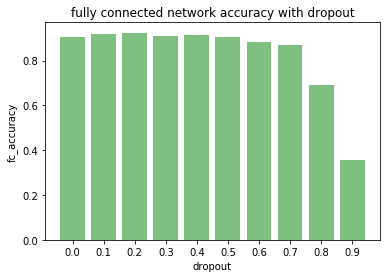

In [304]:
#Plot the accuracy for different dropout values on fully connected model
objects = tuple(dropout_test_values)
y_pos = np.arange(len(objects))
 
plt.bar(y_pos,accuracy, align='center', alpha=0.5,color = 'green')
plt.xticks(y_pos, objects)
plt.xlabel('dropout')
plt.ylabel('fc_accuracy')
plt.title('fully connected network accuracy with dropout')
#plt.savefig('/Users/salman/Documents/DL/PP1/1.png')
plt.show()


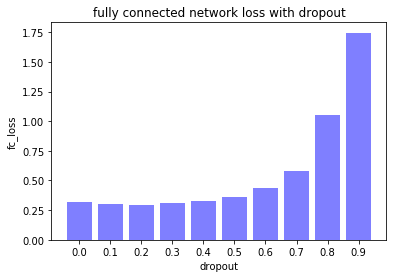

In [305]:
#Plot the loss for different dropout values on fully connected model
plt.bar(y_pos,loss, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, objects)
plt.xlabel('dropout')
plt.ylabel('fc_loss')
plt.title('fully connected network loss with dropout')
#plt.savefig('/Users/salman/Documents/DL/PP1/2.png')
plt.show()

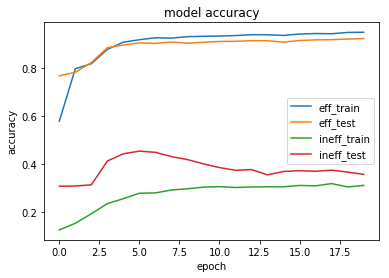

In [306]:
# Plotting the accuracy for one effective and one ineffective case for dropout
plt.plot(task_III_2_fc[2].history['acc'])
plt.plot(task_III_2_fc[2].history['val_acc'])

plt.plot(task_III_2_fc[9].history['acc'])
plt.plot(task_III_2_fc[9].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/3.png')

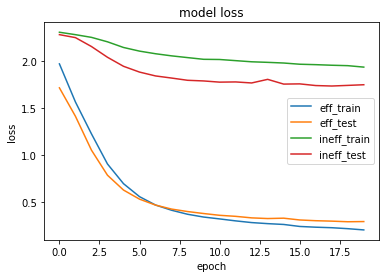

In [307]:
# Plotting the loss for one effective and one ineffective case for dropout
plt.plot(task_III_2_fc[2].history['loss'])
plt.plot(task_III_2_fc[2].history['val_loss'])

plt.plot(task_III_2_fc[9].history['loss'])
plt.plot(task_III_2_fc[9].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/4.png')

In [135]:
#Trying dropout for locally connected model
def locally_connected_model(dropout):
    model = Sequential()
    model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
    model.add(LocallyConnected2D(64, (3, 3), activation='relu'))
    model.add(Dropout(dropout))
    model.add(LocallyConnected2D(32, (3, 3), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(64, activation='tanh'))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model

epoch_size=20
lc_loss = []
lc_accuracy = []
task_III_2_lc=[]
dropout_test_values_lc = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
for i in range(len(dropout_test_values_lc)):
    task_III_2_lc.append([])
dropout_counter_lc=0
for dropout in dropout_test_values_lc:
    print ("Dropout: ", dropout)
    model = locally_connected_model(dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    task_III_2_lc[dropout_counter_lc] = model.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=10, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    lc_loss.append(score[0])
    lc_accuracy.append(score[1])
    dropout_counter_lc+=1

Dropout:  0.0
Train on 7291 samples, validate on 2007 samples
Epoch 1/10
7291/7291 [==============================] - 118s 16ms/step - loss: 1.1723 - acc: 0.6921 - val_loss: 0.6148 - val_acc: 0.8744
Epoch 2/10
7291/7291 [==============================] - 103s 14ms/step - loss: 0.3564 - acc: 0.9377 - val_loss: 0.3579 - val_acc: 0.9188
Epoch 3/10
7291/7291 [==============================] - 104s 14ms/step - loss: 0.1859 - acc: 0.9690 - val_loss: 0.2757 - val_acc: 0.9317
Epoch 4/10
7291/7291 [==============================] - 104s 14ms/step - loss: 0.1232 - acc: 0.9796 - val_loss: 0.2420 - val_acc: 0.9397
Epoch 5/10
7291/7291 [==============================] - 105s 14ms/step - loss: 0.0910 - acc: 0.9849 - val_loss: 0.2107 - val_acc: 0.9437
Epoch 6/10
7291/7291 [==============================] - 105s 14ms/step - loss: 0.0664 - acc: 0.9901 - val_loss: 0.2060 - val_acc: 0.9442
Epoch 7/10
7291/7291 [==============================] - 105s 14ms/step - loss: 0.0503 - acc: 0.9937 - val_loss: 0.18

7291/7291 [==============================] - 106s 15ms/step - loss: 0.3465 - acc: 0.9091 - val_loss: 0.3305 - val_acc: 0.9103
Epoch 6/10
7291/7291 [==============================] - 106s 15ms/step - loss: 0.3040 - acc: 0.9183 - val_loss: 0.3019 - val_acc: 0.9193
Epoch 7/10
7291/7291 [==============================] - 106s 15ms/step - loss: 0.2696 - acc: 0.9250 - val_loss: 0.2886 - val_acc: 0.9173
Epoch 8/10
7291/7291 [==============================] - 106s 15ms/step - loss: 0.2427 - acc: 0.9343 - val_loss: 0.2927 - val_acc: 0.9138
Epoch 9/10
7291/7291 [==============================] - 106s 15ms/step - loss: 0.2219 - acc: 0.9364 - val_loss: 0.2593 - val_acc: 0.9268
Epoch 10/10
7291/7291 [==============================] - 107s 15ms/step - loss: 0.2083 - acc: 0.9423 - val_loss: 0.2619 - val_acc: 0.9278
Test loss: 0.26192461335071
Test accuracy: 0.9277528650913894


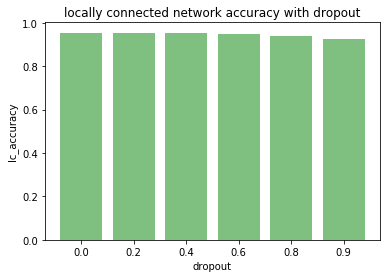

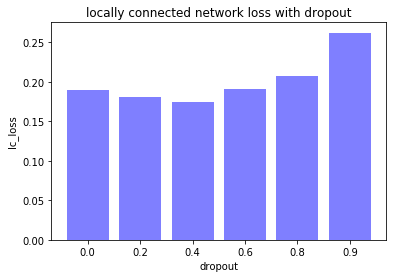

In [310]:
#plotting accuracy and loss after experimenting on dropouts 
objects = tuple(dropout_test_values_lc)
y_pos = np.arange(len(objects))
plt.bar(y_pos,lc_accuracy, align='center', alpha=0.5,color = 'green')
plt.xticks(y_pos, objects)
plt.xlabel('dropout')
plt.ylabel('lc_accuracy')
plt.title('locally connected network accuracy with dropout')
#plt.savefig('/Users/salman/Documents/DL/PP1/5.png')
plt.show()

plt.bar(y_pos,lc_loss, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, objects)
plt.xlabel('dropout')
plt.ylabel('lc_loss')
plt.title('locally connected network loss with dropout')
#plt.savefig('/Users/salman/Documents/DL/PP1/6.png')
plt.show()

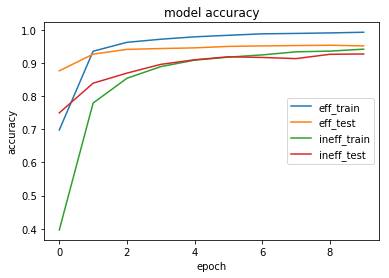

In [311]:
# Plotting the accuracy for effective and ineffective case
plt.plot(task_III_2_lc[2].history['acc'])
plt.plot(task_III_2_lc[2].history['val_acc'])

plt.plot(task_III_2_lc[5].history['acc'])
plt.plot(task_III_2_lc[5].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/7.png')

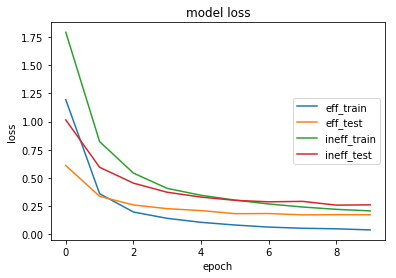

In [312]:
# Plotting the loss for effective and ineffective case
plt.plot(task_III_2_lc[2].history['loss'])
plt.plot(task_III_2_lc[2].history['val_loss'])

plt.plot(task_III_2_lc[5].history['loss'])
plt.plot(task_III_2_lc[5].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/8.png')

In [190]:
#print(K.image_data_format())
#K.set_image_dim_ordering('tf')

channels_first


In [203]:
#trying dropout on convolutional network
def cnn_model(dropout):
    model = Sequential()
    model.add(Conv2D(32, (3, 3),activation = 'relu',input_shape = input_shape))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(dropout))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(dropout))
    model.add(Conv2D(32, (2, 2), activation = 'relu'))
    model.add(Dropout(dropout))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation = 'tanh'))
    # model.add(Dense(50, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'sigmoid'))
    return model
epoch_size=20
cnn_loss = []
cnn_accuracy = []
task_III_2_cnn=[]
dropout_test_values_cnn = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dropout_counter_cnn=0
for i in range(len(dropout_test_values_cnn)):
    task_III_2_cnn.append([])
for dropout in dropout_test_values_cnn:
    print ("Dropout: ", dropout)
    model = cnn_model(dropout)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    task_III_2_cnn[dropout_counter_cnn] = model.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=epoch_size, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    cnn_loss.append(score[0])
    cnn_accuracy.append(score[1])
    dropout_counter_cnn+=1

Dropout:  0.0
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 20s 3ms/step - loss: 1.6149 - acc: 0.6216 - val_loss: 0.9708 - val_acc: 0.7937
Epoch 2/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.6046 - acc: 0.8943 - val_loss: 0.4913 - val_acc: 0.8869
Epoch 3/20
7291/7291 [==============================] - 12s 2ms/step - loss: 0.3078 - acc: 0.9418 - val_loss: 0.3460 - val_acc: 0.9153
Epoch 4/20
7291/7291 [==============================] - 11s 2ms/step - loss: 0.2003 - acc: 0.9635 - val_loss: 0.2591 - val_acc: 0.9372
Epoch 5/20
7291/7291 [==============================] - 11s 1ms/step - loss: 0.1451 - acc: 0.9742 - val_loss: 0.2440 - val_acc: 0.9362
Epoch 6/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.1138 - acc: 0.9798 - val_loss: 0.2067 - val_acc: 0.9457
Epoch 7/20
7291/7291 [==============================] - 9s 1ms/step - loss: 0.0921 - acc: 0.9845 - val_loss: 0.1950 - val_acc: 0

7291/7291 [==============================] - 10s 1ms/step - loss: 0.0786 - acc: 0.9779 - val_loss: 0.1523 - val_acc: 0.9581
Epoch 20/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.0699 - acc: 0.9815 - val_loss: 0.1487 - val_acc: 0.9586
Test loss: 0.1487464871225989
Test accuracy: 0.9586447435169001
Dropout:  0.3
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 22s 3ms/step - loss: 1.9614 - acc: 0.3699 - val_loss: 1.3568 - val_acc: 0.6597
Epoch 2/20
7291/7291 [==============================] - 10s 1ms/step - loss: 1.1173 - acc: 0.7003 - val_loss: 0.6686 - val_acc: 0.8445
Epoch 3/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.6709 - acc: 0.8268 - val_loss: 0.4327 - val_acc: 0.8899
Epoch 4/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.4722 - acc: 0.8759 - val_loss: 0.3311 - val_acc: 0.9118
Epoch 5/20
7291/7291 [==============================] - 10s 1ms/step - los

Epoch 17/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3572 - acc: 0.8888 - val_loss: 0.1954 - val_acc: 0.9437
Epoch 18/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3427 - acc: 0.8960 - val_loss: 0.1947 - val_acc: 0.9437
Epoch 19/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3367 - acc: 0.8959 - val_loss: 0.1887 - val_acc: 0.9417
Epoch 20/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3179 - acc: 0.9029 - val_loss: 0.1836 - val_acc: 0.9427
Test loss: 0.18360589026632626
Test accuracy: 0.9427005482005075
Dropout:  0.6
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 22s 3ms/step - loss: 2.2653 - acc: 0.1757 - val_loss: 2.1687 - val_acc: 0.3044
Epoch 2/20
7291/7291 [==============================] - 10s 1ms/step - loss: 2.0377 - acc: 0.3087 - val_loss: 1.5782 - val_acc: 0.6208
Epoch 3/20
7291/7291 [==============================] - 10s

7291/7291 [==============================] - 14s 2ms/step - loss: 1.5666 - acc: 0.4174 - val_loss: 1.1886 - val_acc: 0.5830
Epoch 15/20
7291/7291 [==============================] - 12s 2ms/step - loss: 1.5431 - acc: 0.4231 - val_loss: 1.1467 - val_acc: 0.5850
Epoch 16/20
7291/7291 [==============================] - 10s 1ms/step - loss: 1.5165 - acc: 0.4286 - val_loss: 1.1197 - val_acc: 0.5710
Epoch 17/20
7291/7291 [==============================] - 10s 1ms/step - loss: 1.5010 - acc: 0.4389 - val_loss: 1.0860 - val_acc: 0.6348
Epoch 18/20
7291/7291 [==============================] - 10s 1ms/step - loss: 1.4598 - acc: 0.4360 - val_loss: 1.0541 - val_acc: 0.6941
Epoch 19/20
7291/7291 [==============================] - 10s 1ms/step - loss: 1.4556 - acc: 0.4525 - val_loss: 1.0168 - val_acc: 0.6931
Epoch 20/20
7291/7291 [==============================] - 10s 1ms/step - loss: 1.4440 - acc: 0.4549 - val_loss: 0.9848 - val_acc: 0.7015
Test loss: 0.9848074739289391
Test accuracy: 0.7015445936242

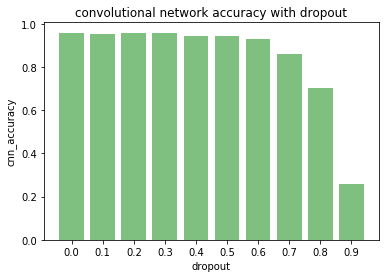

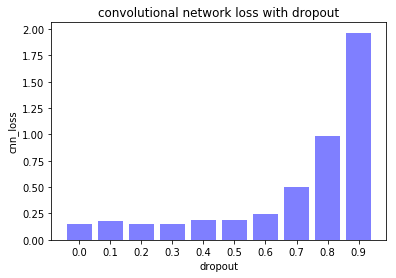

In [314]:
#plotting the accuracy and loss for dropouts on cnn
objects = tuple(dropout_test_values_cnn)
y_pos = np.arange(len(objects))
plt.bar(y_pos,cnn_accuracy, align='center', alpha=0.5,color = 'green')
plt.xticks(y_pos, objects)
plt.xlabel('dropout')
plt.ylabel('cnn_accuracy')
plt.title('convolutional network accuracy with dropout')
#plt.savefig('/Users/salman/Documents/DL/PP1/9.png')
plt.show()

plt.bar(y_pos,cnn_loss, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, objects)
plt.xlabel('dropout')
plt.ylabel('cnn_loss')
plt.title('convolutional network loss with dropout')
#plt.savefig('/Users/salman/Documents/DL/PP1/10.png')
plt.show()

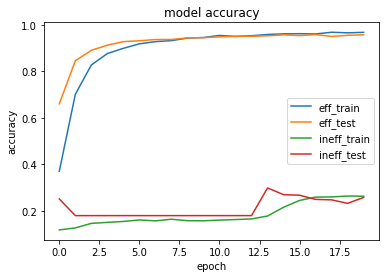

In [315]:
# Plotting the accuracy for effective and ineffective case
plt.plot(task_III_2_cnn[3].history['acc'])
plt.plot(task_III_2_cnn[3].history['val_acc'])

plt.plot(task_III_2_cnn[9].history['acc'])
plt.plot(task_III_2_cnn[9].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/11.png')

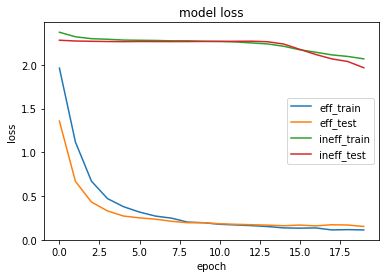

In [316]:
# Plotting the loss for effective and ineffective case
plt.plot(task_III_2_cnn[3].history['loss'])
plt.plot(task_III_2_cnn[3].history['val_loss'])

plt.plot(task_III_2_cnn[9].history['loss'])
plt.plot(task_III_2_cnn[9].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/12.png')

In [220]:
# (3)L1 regularization. Explain the effects of the L1
# regularization on the three neural networks you have. 
# Then demonstrate an effective L1 regularization case
# and an in effective L1 regularization case on each 
# of the three neural networks you have

#regularization on fully connected model
def fully_connected_model_l1(lambd):
    model = Sequential()
    model.add(Dense(32, input_shape=input_shape, kernel_initializer='normal', kernel_regularizer=regularizers.l1(lambd),activation='relu'))
    model.add(Dense(64, kernel_initializer='normal', kernel_regularizer=regularizers.l1(lambd),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l1(lambd), activation='tanh'))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model
epoch_size=20
fc_loss_l1 = []
fc_accuracy_l1 = []
lambda_test_values = [0, 0.0001, 0.001, 0.005, 0.01, 0.5]
task_III_3_fc=[]
for i in range(len(lambda_test_values)):
    task_III_3_fc.append([])
lambda_counter=0
for lambd in lambda_test_values:
    print ("Lambda Value for L1: ", lambd)
    model = fully_connected_model_l1(lambd)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    task_III_3_fc[lambda_counter] = model.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=10, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    fc_loss_l1.append(score[0])
    fc_accuracy_l1.append(score[1])
    lambda_counter+=1


Lambda Value for L1:  0
Train on 7291 samples, validate on 2007 samples
Epoch 1/10
7291/7291 [==============================] - 33s 5ms/step - loss: 1.5088 - acc: 0.7101 - val_loss: 1.1166 - val_acc: 0.8515
Epoch 2/10
7291/7291 [==============================] - 20s 3ms/step - loss: 0.8385 - acc: 0.9172 - val_loss: 0.7316 - val_acc: 0.8949
Epoch 3/10
7291/7291 [==============================] - 20s 3ms/step - loss: 0.5390 - acc: 0.9402 - val_loss: 0.5603 - val_acc: 0.9078
Epoch 4/10
7291/7291 [==============================] - 20s 3ms/step - loss: 0.3896 - acc: 0.9536 - val_loss: 0.4686 - val_acc: 0.9033
Epoch 5/10
7291/7291 [==============================] - 20s 3ms/step - loss: 0.3032 - acc: 0.9593 - val_loss: 0.4236 - val_acc: 0.9063
Epoch 6/10
7291/7291 [==============================] - 20s 3ms/step - loss: 0.2486 - acc: 0.9663 - val_loss: 0.3825 - val_acc: 0.9108
Epoch 7/10
7291/7291 [==============================] - 20s 3ms/step - loss: 0.2075 - acc: 0.9711 - val_loss: 0.3592 -

Epoch 6/10
7291/7291 [==============================] - 21s 3ms/step - loss: 33.6257 - acc: 0.1638 - val_loss: 33.6398 - val_acc: 0.1789
Epoch 7/10
7291/7291 [==============================] - 21s 3ms/step - loss: 33.5468 - acc: 0.1638 - val_loss: 33.5938 - val_acc: 0.1789
Epoch 8/10
7291/7291 [==============================] - 21s 3ms/step - loss: 33.4743 - acc: 0.1638 - val_loss: 33.5439 - val_acc: 0.1789
Epoch 9/10
7291/7291 [==============================] - 21s 3ms/step - loss: 33.4566 - acc: 0.1638 - val_loss: 33.4014 - val_acc: 0.1789
Epoch 10/10
7291/7291 [==============================] - 21s 3ms/step - loss: 33.4314 - acc: 0.1638 - val_loss: 33.5150 - val_acc: 0.1789
Test loss: 33.51495990078427
Test accuracy: 0.17887394112410923


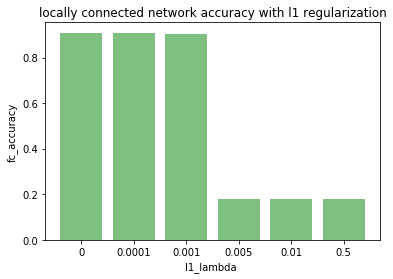

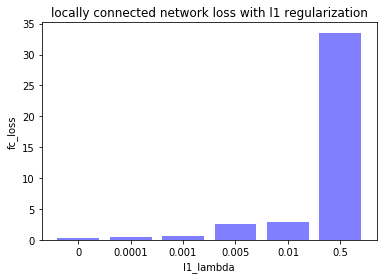

In [318]:
#Experimenting on different l1 regularization on fc
objects = tuple(lambda_test_values)
y_pos = np.arange(len(objects))
plt.bar(y_pos,fc_accuracy_l1, align='center', alpha=0.5,color = 'green')
plt.xticks(y_pos, objects)
plt.xlabel('l1_lambda ')
plt.ylabel('fc_accuracy')
plt.title('locally connected network accuracy with l1 regularization')
#plt.savefig('/Users/salman/Documents/DL/PP1/13.png')
plt.show()

plt.bar(y_pos,fc_loss_l1, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, objects)
plt.xlabel('l1_lambda')
plt.ylabel('fc_loss')
plt.title('locally connected network loss with l1 regularization')
#plt.savefig('/Users/salman/Documents/DL/PP1/14.png')
plt.show()

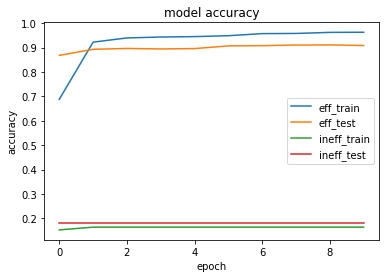

In [319]:
# Plotting the accuracy for effective and ineffective case
plt.plot(task_III_3_fc[1].history['acc'])
plt.plot(task_III_3_fc[1].history['val_acc'])

plt.plot(task_III_3_fc[4].history['acc'])
plt.plot(task_III_3_fc[4].history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train','ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/15.png')
plt.show()

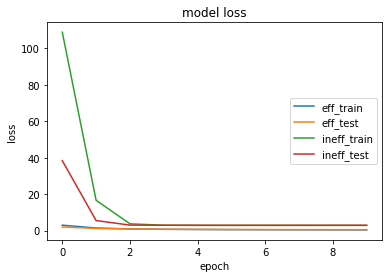

In [320]:
# Plotting the loss for effective and in effective case
plt.plot(task_III_3_fc[1].history['loss'])
plt.plot(task_III_3_fc[1].history['val_loss'])

plt.plot(task_III_3_fc[4].history['loss'])
plt.plot(task_III_3_fc[4].history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train','ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/16.png')

In [247]:
#l1 regularization on cnn model
def cnn_model_l1(lambd):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation = 'relu',kernel_regularizer=regularizers.l1(lambd)))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(64, (3, 3), activation = 'relu',kernel_regularizer=regularizers.l1(lambd)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (2, 2), activation='relu',kernel_regularizer=regularizers.l1(lambd)))
    model.add(Flatten())
    model.add(Dense(64, activation = 'tanh',kernel_regularizer=regularizers.l1(lambd)))
    model.add(Dense(num_classes, activation = 'sigmoid'))
    return model
epoch_size=20
cnn_loss_l1 = []
cnn_accuracy_l1 = []
task_III_3_cnn=[]
for i in range(len(lambda_test_values)):
    task_III_3_cnn.append([])
lambda_counter_cnn=0
for lambd in lambda_test_values:
    print ("Lambda Value for L1: ", lambd)
    model = cnn_model_l1(lambd)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    task_III_3_cnn[lambda_counter_cnn] = model.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=epoch_size, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    cnn_loss_l1.append(score[0])
    cnn_accuracy_l1.append(score[1])
    lambda_counter_cnn+=1



Lambda Value for L1:  0
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 24s 3ms/step - loss: 1.7230 - acc: 0.5401 - val_loss: 1.0102 - val_acc: 0.7987
Epoch 2/20
7291/7291 [==============================] - 9s 1ms/step - loss: 0.6041 - acc: 0.8977 - val_loss: 0.4746 - val_acc: 0.8974
Epoch 3/20
7291/7291 [==============================] - 9s 1ms/step - loss: 0.3153 - acc: 0.9413 - val_loss: 0.3554 - val_acc: 0.9143
Epoch 4/20
7291/7291 [==============================] - 9s 1ms/step - loss: 0.2037 - acc: 0.9632 - val_loss: 0.2833 - val_acc: 0.9258
Epoch 5/20
7291/7291 [==============================] - 9s 1ms/step - loss: 0.1499 - acc: 0.9723 - val_loss: 0.2425 - val_acc: 0.9352
Epoch 6/20
7291/7291 [==============================] - 9s 1ms/step - loss: 0.1164 - acc: 0.9779 - val_loss: 0.2147 - val_acc: 0.9382
Epoch 7/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.0940 - acc: 0.9807 - val_loss: 0.1920 - val_

7291/7291 [==============================] - 9s 1ms/step - loss: 0.3885 - acc: 0.9739 - val_loss: 0.5122 - val_acc: 0.9312
Epoch 20/20
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3819 - acc: 0.9767 - val_loss: 0.5104 - val_acc: 0.9367
Test loss: 0.5104425214657928
Test accuracy: 0.9367214749568603
Lambda Value for L1:  0.005
Train on 7291 samples, validate on 2007 samples
Epoch 1/20
7291/7291 [==============================] - 24s 3ms/step - loss: 6.8664 - acc: 0.2692 - val_loss: 4.3354 - val_acc: 0.1789
Epoch 2/20
7291/7291 [==============================] - 9s 1ms/step - loss: 3.3247 - acc: 0.1638 - val_loss: 2.7336 - val_acc: 0.1789
Epoch 3/20
7291/7291 [==============================] - 9s 1ms/step - loss: 2.5571 - acc: 0.1638 - val_loss: 2.4214 - val_acc: 0.1789
Epoch 4/20
7291/7291 [==============================] - 9s 1ms/step - loss: 2.3514 - acc: 0.1638 - val_loss: 2.2969 - val_acc: 0.1789
Epoch 5/20
7291/7291 [==============================] - 9s 1ms/s

Epoch 17/20
7291/7291 [==============================] - 9s 1ms/step - loss: 4.0665 - acc: 0.1638 - val_loss: 4.0499 - val_acc: 0.1789
Epoch 18/20
7291/7291 [==============================] - 9s 1ms/step - loss: 4.0670 - acc: 0.1638 - val_loss: 4.0683 - val_acc: 0.1789
Epoch 19/20
7291/7291 [==============================] - 9s 1ms/step - loss: 4.0665 - acc: 0.1638 - val_loss: 4.0631 - val_acc: 0.1789
Epoch 20/20
7291/7291 [==============================] - 9s 1ms/step - loss: 4.0674 - acc: 0.1638 - val_loss: 4.0532 - val_acc: 0.1789
Test loss: 4.053237970634426
Test accuracy: 0.17887394112410923


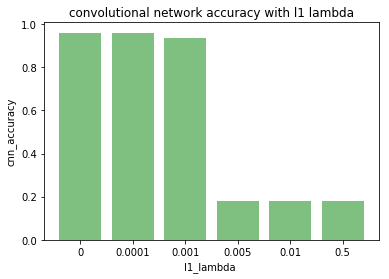

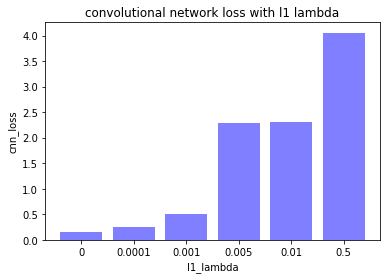

In [322]:
#plot experimental results of different regularization values
objects = tuple(lambda_test_values)
y_pos = np.arange(len(objects))
plt.bar(y_pos,cnn_accuracy_l1, align='center', alpha=0.5,color = 'green')
plt.xticks(y_pos, objects)
plt.xlabel('l1_lambda ')
plt.ylabel('cnn_accuracy')
plt.title('convolutional network accuracy with l1 lambda')
#plt.savefig('/Users/salman/Documents/DL/PP1/17.png')
plt.show()

plt.bar(y_pos,cnn_loss_l1, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, objects)
plt.xlabel('l1_lambda')
plt.ylabel('cnn_loss')
plt.title('convolutional network loss with l1 lambda')
#plt.savefig('/Users/salman/Documents/DL/PP1/18.png') 
plt.show()

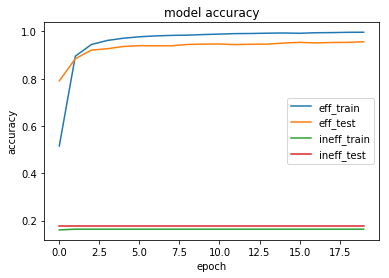

In [323]:
# Plotting the accuracy for l1 regularization effective and ineffective case
plt.plot(task_III_3_cnn[1].history['acc'])
plt.plot(task_III_3_cnn[1].history['val_acc'])

plt.plot(task_III_3_cnn[4].history['acc'])
plt.plot(task_III_3_cnn[4].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/19.png')

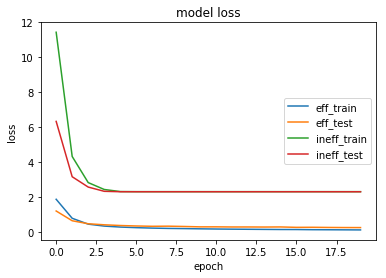

In [324]:
# Plotting the loss for effective and ineffective case 
plt.plot(task_III_3_cnn[1].history['loss'])
plt.plot(task_III_3_cnn[1].history['val_loss'])

plt.plot(task_III_3_cnn[4].history['loss'])
plt.plot(task_III_3_cnn[4].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/20.png')

In [249]:
#l1 regularization on locally conected model
def locally_connected_model_l1(lambd):
    # create model
    model = Sequential()
    model.add(LocallyConnected2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape,kernel_regularizer=regularizers.l1(lambd)))
    model.add(LocallyConnected2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(lambd)))
    model.add(LocallyConnected2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(lambd)))
    model.add(Flatten())
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l1(lambd)))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model
lc_loss_l1 = []
lc_accuracy_l1 = []
task_III_3_lc=[]
for i in range(len(lambda_test_values)):
    task_III_3_lc.append([])
lambda_counter_lc=0
for lambd in lambda_test_values:
    print ("Lambda Value for L1: ", lambd)
    model = locally_connected_model_l1(lambd)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    task_III_3_lc[lambda_counter_lc] = model.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=10, verbose=1, validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    lc_loss_l1.append(score[0])
    lc_accuracy_l1.append(score[1])
    lambda_counter_lc+=1

Lambda Value for L1:  0
Train on 7291 samples, validate on 2007 samples
Epoch 1/10
7291/7291 [==============================] - 122s 17ms/step - loss: 1.1330 - acc: 0.6976 - val_loss: 0.5897 - val_acc: 0.8670
Epoch 2/10
7291/7291 [==============================] - 103s 14ms/step - loss: 0.3440 - acc: 0.9405 - val_loss: 0.3533 - val_acc: 0.9163
Epoch 3/10
7291/7291 [==============================] - 104s 14ms/step - loss: 0.1877 - acc: 0.9676 - val_loss: 0.2804 - val_acc: 0.9268
Epoch 4/10
7291/7291 [==============================] - 105s 14ms/step - loss: 0.1301 - acc: 0.9770 - val_loss: 0.2247 - val_acc: 0.9412
Epoch 5/10
7291/7291 [==============================] - 105s 14ms/step - loss: 0.0974 - acc: 0.9823 - val_loss: 0.2184 - val_acc: 0.9402
Epoch 6/10
7291/7291 [==============================] - 106s 15ms/step - loss: 0.0774 - acc: 0.9856 - val_loss: 0.2004 - val_acc: 0.9417
Epoch 7/10
7291/7291 [==============================] - 105s 14ms/step - loss: 0.0562 - acc: 0.9911 - val_

Epoch 5/10
7291/7291 [==============================] - 107s 15ms/step - loss: 306.2684 - acc: 0.1638 - val_loss: 302.2932 - val_acc: 0.1789
Epoch 6/10
7291/7291 [==============================] - 107s 15ms/step - loss: 306.3114 - acc: 0.1638 - val_loss: 307.0405 - val_acc: 0.1789
Epoch 7/10
7291/7291 [==============================] - 107s 15ms/step - loss: 305.8583 - acc: 0.1638 - val_loss: 308.8527 - val_acc: 0.1789
Epoch 8/10
7291/7291 [==============================] - 107s 15ms/step - loss: 305.4955 - acc: 0.1638 - val_loss: 311.8406 - val_acc: 0.1789
Epoch 9/10
7291/7291 [==============================] - 107s 15ms/step - loss: 305.5624 - acc: 0.1638 - val_loss: 300.0147 - val_acc: 0.1789
Epoch 10/10
7291/7291 [==============================] - 108s 15ms/step - loss: 305.4564 - acc: 0.1638 - val_loss: 308.3197 - val_acc: 0.1789
Test loss: 308.31968268530846
Test accuracy: 0.17887394112410923


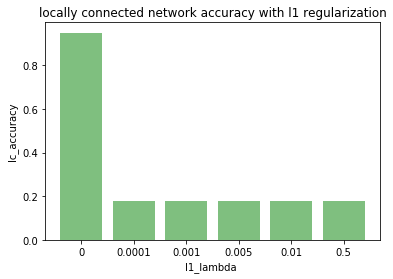

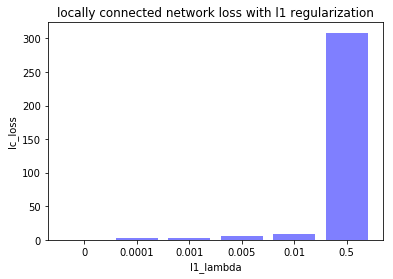

In [326]:
#experimental results of l1 regularization on lc
objects = tuple(lambda_test_values)
y_pos = np.arange(len(objects))
plt.bar(y_pos,lc_accuracy_l1, align='center', alpha=0.5,color = 'green')
plt.xticks(y_pos, objects)
plt.xlabel('l1_lambda ')
plt.ylabel('lc_accuracy')
plt.title('locally connected network accuracy with l1 regularization')
#plt.savefig('/Users/salman/Documents/DL/PP1/21.png')
plt.show()

plt.bar(y_pos,lc_loss_l1, align='center', alpha=0.5,color = 'blue')
plt.xticks(y_pos, objects)
plt.xlabel('l1_lambda')
plt.ylabel('lc_loss')
plt.title('locally connected network loss with l1 regularization')
#plt.savefig('/Users/salman/Documents/DL/PP1/22.png') 
plt.show()

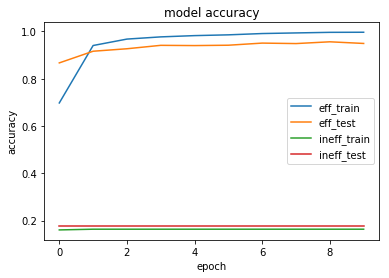

In [327]:
# Plotting the accuracy for effective and ineffective case
plt.plot(task_III_3_lc[0].history['acc'])
plt.plot(task_III_3_lc[0].history['val_acc'])

plt.plot(task_III_3_lc[5].history['acc'])
plt.plot(task_III_3_lc[5].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/23.png')

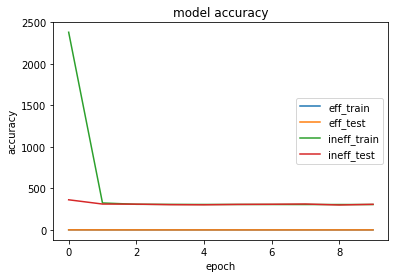

In [328]:
# Plotting the loss for effective and ineffective case
plt.plot(task_III_3_lc[0].history['loss'])
plt.plot(task_III_3_lc[0].history['val_loss'])

plt.plot(task_III_3_lc[5].history['loss'])
plt.plot(task_III_3_lc[5].history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['eff_train', 'eff_test','ineff_train', 'ineff_test'], loc='center right')
#plt.savefig('/Users/salman/Documents/DL/PP1/24.png')


In [416]:
# Task III -1-Ensemble
# Techniques for Improving Generalization For this task, you need to
# do the required analysis and apply the following regularization techniques 
# with the goal to improve the performance on the 2007 samples
# in zip_test.txt.

# (1)Use an Ensemble to improve the generalization performance.
# Here you need to use bagging of at least six
# neural networks to improve the performance of the individual 
# neural networks. You need to analyze your results.

#Taking six models for ensemble
model1=cnn_model(0.2)
model2=cnn_model(0)
model3=fully_connected_model(0)
model4=fully_connected_model(0.2)
model5=cnn_model_l1(0.0001)
model6=fully_connected_model_l1(0.0001)

In [422]:
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model4.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model5.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model6.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [424]:
task_III_1_model1 = model1.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=10, verbose=1, validation_data=(x_test, y_test))
task_III_1_model3 = model3.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=10, verbose=1, validation_data=(x_test, y_test))
task_III_1_model2 = model2.fit(x_train, y_train, batch_size=batch_size, 
                          epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 7291 samples, validate on 2007 samples
Epoch 1/10
7291/7291 [==============================] - 11s 2ms/step - loss: 1.4408 - acc: 0.6156 - val_loss: 0.8309 - val_acc: 0.8266
Epoch 2/10
7291/7291 [==============================] - 9s 1ms/step - loss: 0.7183 - acc: 0.8292 - val_loss: 0.4697 - val_acc: 0.8924
Epoch 3/10
7291/7291 [==============================] - 10s 1ms/step - loss: 0.4434 - acc: 0.8970 - val_loss: 0.3397 - val_acc: 0.9138
Epoch 4/10
7291/7291 [==============================] - 10s 1ms/step - loss: 0.3336 - acc: 0.9206 - val_loss: 0.2681 - val_acc: 0.9342
Epoch 5/10
7291/7291 [==============================] - 10s 1ms/step - loss: 0.2530 - acc: 0.9380 - val_loss: 0.2363 - val_acc: 0.9352
Epoch 6/10
7291/7291 [==============================] - 10s 1ms/step - loss: 0.2127 - acc: 0.9475 - val_loss: 0.2057 - val_acc: 0.9472
Epoch 7/10
7291/7291 [==============================] - 10s 1ms/step - loss: 0.1878 - acc: 0.9527 - val_loss: 0.1948 - val_acc: 0.9467
Epoch 8/

In [455]:
#Getting the predictions for all six models
y_true =y_test.argmax(1)
pred_labels=[]
y_predicted=[]
for i in range(len(x_test)):
    pred_labels.append([])
    
for i in range(len(x_test)):    
    pred_last_layer_values1 = model1.predict(x_test[i].reshape(1,16,16,1))
    label1=pred_last_layer_values1.argmax(1)
    pred_labels[i].append(label1[0])
    pred_last_layer_values2 = model2.predict(x_test[i].reshape(1,16,16,1))
    label2=pred_last_layer_values2.argmax(1)
    pred_labels[i].append(label2[0])
    pred_last_layer_values4 = model4.predict(x_test[i].reshape(1,16,16,1))
    label4=pred_last_layer_values4.argmax(1)
    pred_labels[i].append(label4[0])
    pred_last_layer_values5 = model5.predict(x_test[i].reshape(1,16,16,1))
    label5=pred_last_layer_values5.argmax(1)
    pred_labels[i].append(label5[0])
    pred_last_layer_values6 = model6.predict(x_test[i].reshape(1,16,16,1))
    label6=pred_last_layer_values6.argmax(1)
    pred_labels[i].append(label6[0])
    pred_last_layer_values3 = model3.predict(x_test[i].reshape(1,16,16,1))
    label3=pred_last_layer_values3.argmax(1)
    pred_labels[i].append(label3[0])
    #print(pred_last_layer_values)
    #print(label)
    #print(pred_labels)
    max_freq_of_pred_labels = max(pred_labels[i],key=pred_labels[i].count)
    y_predicted.append(max_freq_of_pred_labels)
    
#print(y_true)
#print(y_predicted)
#Calculating the accuracy for the ensemble
accurate_pred_count=0
zipped_list=(zip(y_true,y_predicted))
for item in zipped_list:
    if(item[0]==item[1]):
        accurate_pred_count+=1
    else:
        continue
#print(accurate_pred_count)
ensemble_acc= accurate_pred_count/len(y_true)
ensemble_loss= (2007-accurate_pred_count)/len(y_true)
print('Test loss:', ensemble_loss)
print('Test accuracy:', ensemble_acc)

Test loss: 0.052316890881913304
Test accuracy: 0.9476831091180867
